In [347]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.regression.linear_model import OLS

In [348]:
# import os
# os.mkdir('/kaggle/working/outputs')

# Trend

In [349]:
class Trend:
    def __init__(self, df, y: str, x: str):
        self.df = df
        self.x = x
        self.y = y
        
    def _index_df(self):
        idf = pd.DataFrame(self.df[[self.x, self.y]])
        idf[self.x] = pd.to_datetime(idf[self.x], infer_datetime_format = True)
        idf = idf.set_index([self.x])
        self.idf = idf
    
    def trend(self):
        self._index_df()
        t = seasonal_decompose(self.idf, model = "multiplicative").trend
        return t
    
    def plot(self, show_plot = False):
        t = self.trend()
        vals = t.array.dropna().tolist()
        if not show_plot:
            return {
                "title": "Trend of " + self.idf.columns[0] + ":",
                "data": vals,
                "x": [str(i.date()) for i in self.idf.index.to_list()]
            }
        else:
            t.plot()
    
    def detrend(self):
        least_squares = OLS(self.df[self.y].values, list(range(self.df.shape[0])))
        result = least_squares.fit()
        fit = pd.Series(result.predict(list(range(df.shape[0]))), index = self.df.index)
        detrended = self.df[self.y].values - fit.values
        
        detrend_df = pd.DataFrame()
        detrend_df['Original'] = self.df[self.y]
        detrend_df['Detrend'] = pd.Series(detrended)
        detrend_df[self.x] = self.df[self.x]
        detrend_df = detrend_df.set_index([self.x])
        return detrend_df
        
    
    def plot_detrend(self, show_plot = False):
        d = self.detrend()
        if not show_plot:
            return {
                "title": "Original vs Detrend of " + self.idf.columns[0] + ":",
                "data": d['Original'].values.tolist(),
                "data_detrend": d['Detrend'].values.tolist(),
                "x": [str(i.date()) for i in self.idf.index.to_list()]
            }
        else:
            d.plot()
        
        
        

In [350]:
df = pd.read_csv('/kaggle/input/time-series-datasets/Electric_Production.csv')

In [351]:
t = Trend(df, 'IPG2211A2N', 'DATE')

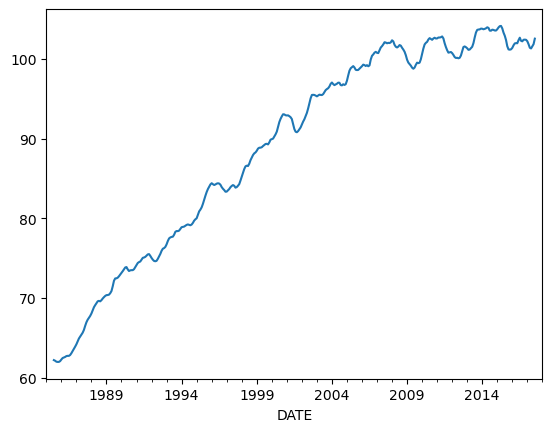

In [352]:
t.plot(show_plot = True)

In [353]:
o = t.plot_detrend()

In [354]:
import sys
def out_to_file(data):
    old_stdout = sys.stdout
    sys.stdout = open('/kaggle/working/outputs/output.txt', 'w')

    print(data)

    sys.stdout = old_stdout 

In [355]:
out_to_file(o['data_detrend'])

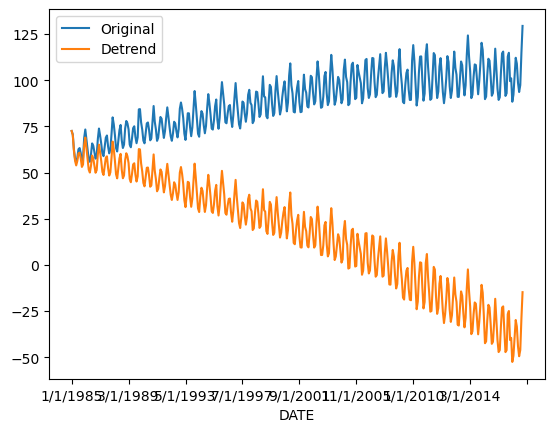

In [356]:
t.plot_detrend(show_plot = True)

# Seasonality

In [357]:
class Seasonality:
    def __init__(self, df, y: str, x: str):
        self.df = df
        self.x = x
        self.y = y
        
    def _index_df(self):
        idf = pd.DataFrame(self.df[[self.x, self.y]])
        idf[self.x] = pd.to_datetime(idf[self.x], infer_datetime_format = True)
        idf = idf.set_index([self.x])
        self.idf = idf
    
    def seasonal(self):
        self._index_df()
        t = seasonal_decompose(self.idf, model = "multiplicative").seasonal
        return t
    
    def plot(self, show_plot = False):
        t = self.seasonal()
        vals = t.array.dropna().tolist()
        if not show_plot:
            return {
                "title": "Seasonality of " + self.idf.columns[0] + ":",
                "data": vals,
                "x": [str(i.date()) for i in self.idf.index.to_list()]
            }
        else:
            t.plot()
    
    def deseasonalize(self):
        de = self.df[self.y].values / self.seasonal()
        deseasonalize_df = pd.DataFrame()
        deseasonalize_df['Original'] = self.df[self.y]
        deseasonalize_df['Deseasonalized'] = pd.Series(de.values)
        deseasonalize_df[self.x] = self.df[self.x]
        deseasonalize_df = deseasonalize_df.set_index([self.x])
        return deseasonalize_df
    
    def plot_deseasonalize(self, show_plot = False):
        d = self.deseasonalize()
        if not show_plot:
            return {
                "title": "Original vs Deseasonalized of " + self.idf.columns[0] + ":",
                "data": d['Original'].values.tolist(),
                "data_des": d['Deseasonalized'].values.tolist(),
                "x": [str(i.date()) for i in self.idf.index.to_list()]
            }
        else:
            d.plot()
    

In [358]:
df = pd.read_csv('/kaggle/input/time-series-datasets/Electric_Production.csv')

In [359]:
s = Seasonality(df,'IPG2211A2N', 'DATE' )

In [360]:
r = s.plot()

In [361]:
out_to_file(r['data'])

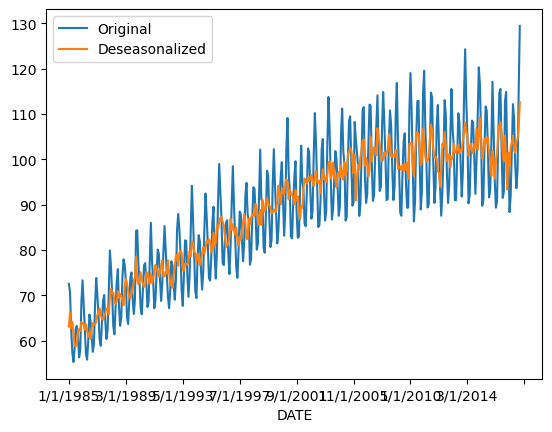

In [362]:
r = s.plot_deseasonalize(show_plot = True)

In [363]:
r = s.plot_deseasonalize()

In [364]:
out_to_file(r['data_des'])

In [365]:
r['title']

'Original vs Deseasonalized of IPG2211A2N:'